In [1]:
# Импортируем необходимую библиотеку
from google.colab import files
import pandas as pd

# Загружаем файл с вашего компьютера
uploaded = files.upload()

# Выводим список загруженных файлов
print("Загруженные файлы:", list(uploaded.keys()))

# Получаем имя загруженного файла
file_name = list(uploaded.keys())[0]
print(f"Работаем с файлом: {file_name}")

Saving DB_3.csv to DB_3.csv
Загруженные файлы: ['DB_3.csv']
Работаем с файлом: DB_3.csv


In [2]:
# Пытаемся прочитать файл с разными сепараторами
try:
    # Пробуем считать с сепаратором ','
    df = pd.read_csv(file_name, sep=',', encoding='utf-8')
    print("Файл успешно загружен с сепаратором ','")
except:
    try:
        # Если не получилось, пробуем с ';'
        df = pd.read_csv(file_name, sep=';', encoding='utf-8')
        print("Файл успешно загружен с сепаратором ';'")
    except:
        try:
            # Пробуем табуляцию
            df = pd.read_csv(file_name, sep='\t', encoding='utf-8')
            print("Файл успешно загружен с сепаратором '\\t' (табуляция)")
        except Exception as e:
            print(f"Не удалось загрузить файл. Ошибка: {e}")

# Выводим первые 5 строк датафрейма, чтобы убедиться, что данные загрузились корректно
print("\nПервые 5 строк данных:")
df.head()

Файл успешно загружен с сепаратором ','

Первые 5 строк данных:


,"user_id\t\tage\tgender\toccupation\twork_mode\t""screen_time_hours\t""\twork_screen_hours\tleisure_screen_hours\tsleep_hours\tsleep_quality_1_5\tstress_level_0_10\t""productivity_0_100\t""\texercise_minutes_per_week\tsocial_hours_per_week\tmental_wellness_index_0_100\tUnnamed: 15"
0,U0001\t33\tFemale\tEmployed\tRemote\t10.79\t5....
1,U0002\t28\tFemale\tEmployed\tIn-person\t7.4\t0...
2,U0003\t35\tFemale\tEmployed\tHybrid\t9.78\t1.0...
3,U0004\t42\tMale\tEmployed\tHybrid\t11.13\t0.56...
4,U0005\t28\tMale\tStudent\tRemote\t13.22\t4.09\...


In [3]:
# Загружаем файл с правильным сепаратором (табуляция)
df = pd.read_csv(file_name, sep='\t', encoding='utf-8')

# Удаляем последнюю пустую колонку, если она есть
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Просматриваем первые 5 строк
print("Первые 5 строк после правильной загрузки:")
df.head()

Первые 5 строк после правильной загрузки:


,user_id\t,age,gender,occupation,work_mode,screen_time_hours\t,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100\t,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1.0,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3.0,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1.0,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1.0,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1.0,10.0,38.5,143,10.1,0.0


In [4]:
# Основная информация о данных
print("Информация о датафрейме:")
print(df.info())

print("\nРазмер данных:", df.shape)
print("Количество строк:", df.shape[0])
print("Количество столбцов:", df.shape[1])

# Названия колонок
print("\nНазвания колонок:")
print(df.columns.tolist())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id	                     398 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       397 non-null    object 
 3   occupation                   399 non-null    object 
 4   work_mode                    398 non-null    object 
 5   screen_time_hours	           398 non-null    float64
 6   work_screen_hours            397 non-null    float64
 7   leisure_screen_hours         399 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            398 non-null    float64
 10  stress_level_0_10            399 non-null    float64
 11  productivity_0_100	          400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  


In [5]:
# Базовая статистика по числовым колонкам
print("Базовая статистика по числовым признакам:")
df.describe()

Базовая статистика по числовым признакам:


,age,screen_time_hours\t,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100\t,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,398.000000,397.000000,399.000000,400.000000,398.000000,399.000000,400.000000,400.000000,400.000000,398.000000
mean,29.77750,9.029171,2.187733,6.837143,7.013175,1.399497,8.145865,54.306500,109.810000,7.905000,20.295729
std,7.46608,2.483373,1.936002,2.221707,0.852421,0.653377,2.095419,15.020054,70.007045,4.909632,20.336537
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.385000,0.700000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.725000
50%,30.00000,9.090000,1.460000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.477500,3.020000,8.385000,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.600000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


In [6]:
# Проверяем пропущенные значения
print("Пропущенные значения в каждом столбце:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Показываем только колонки с пропусками

if missing_values.sum() == 0:
    print("Пропущенных значений нет!")
else:
    print(f"Всего пропущенных значений: {missing_values.sum()}")

Пропущенные значения в каждом столбце:
user_id\t                      2
gender                         3
occupation                     1
work_mode                      2
screen_time_hours\t            2
work_screen_hours              3
leisure_screen_hours           1
sleep_quality_1_5              2
stress_level_0_10              1
mental_wellness_index_0_100    2
dtype: int64
Всего пропущенных значений: 19


In [7]:
# Обработка названий колонок: удаляем лишние табуляции и пробелы
print("Старые названия колонок:")
print(df.columns.tolist())

# Создаем словарь для переименования колонок
column_rename = {
    'user_id\t': 'user_id',
    'screen_time_hours\t': 'screen_time_hours',
    'productivity_0_100\t': 'productivity_0_100'
}

# Переименовываем колонки
df = df.rename(columns=column_rename)

# Также очищаем все названия от лишних пробелов
df.columns = df.columns.str.strip()

print("\nНовые названия колонок:")
print(df.columns.tolist())

Старые названия колонок:
['user_id\t', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours\t', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100\t', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']

Новые названия колонок:
['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']


In [8]:
# Анализируем категориальные признаки
print("Категориальные признаки:")
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns.tolist())

print("\nУникальные значения категориальных признаков:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Количество уникальных значений: {df[col].nunique()}")

Категориальные признаки:
['user_id', 'gender', 'occupation', 'work_mode']

Уникальные значения категориальных признаков:

user_id:
user_id
U0151    2
U0367    2
U0250    1
U0271    1
U0270    1
        ..
U0129    1
U0127    1
U0126    1
U0125    1
U0138    1
Name: count, Length: 396, dtype: int64
Количество уникальных значений: 396

gender:
gender
Female              221
Male                168
Non-binary/Other      8
Name: count, dtype: int64
Количество уникальных значений: 3

occupation:
occupation
Employed         206
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64
Количество уникальных значений: 5

work_mode:
work_mode
Remote       148
Hybrid       146
In-person    104
Name: count, dtype: int64
Количество уникальных значений: 3


In [9]:
# Анализируем числовые признаки
print("Числовые признаки:")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns.tolist())

# Проверяем диапазоны числовых признаков (согласно их названиям)
print("\nПроверка диапазонов числовых признаков:")
range_checks = {
    'sleep_quality_1_5': (1, 5),
    'stress_level_0_10': (0, 10),
    'productivity_0_100': (0, 100),
    'mental_wellness_index_0_100': (0, 100)
}

for col, (min_val, max_val) in range_checks.items():
    if col in df.columns:
        actual_min = df[col].min()
        actual_max = df[col].max()
        print(f"{col}: заявленный диапазон [{min_val}, {max_val}], фактический [{actual_min}, {actual_max}]")

Числовые признаки:
['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100']

Проверка диапазонов числовых признаков:
sleep_quality_1_5: заявленный диапазон [1, 5], фактический [1.0, 4.0]
stress_level_0_10: заявленный диапазон [0, 10], фактический [0.0, 10.0]
productivity_0_100: заявленный диапазон [0, 100], фактический [20.6, 100.0]
mental_wellness_index_0_100: заявленный диапазон [0, 100], фактический [0.0, 97.0]


In [10]:
# Обработка дубликатов user_id
print("Дубликаты user_id перед обработкой:")
duplicates = df[df.duplicated('user_id', keep=False)]
print(f"Найдено {len(duplicates)} строк с дубликатами user_id")

# Удаляем дубликаты, оставляя первую запись
df = df.drop_duplicates(subset=['user_id'], keep='first')

print(f"\nПосле удаления дубликатов: {df.shape[0]} строк")

Дубликаты user_id перед обработкой:
Найдено 6 строк с дубликатами user_id

После удаления дубликатов: 397 строк


In [11]:
# Детальный анализ пропущенных значений
print("Детальный анализ пропущенных значений:")
missing_analysis = pd.DataFrame({
    'Пропущено': df.isnull().sum(),
    'Процент пропусков': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_analysis[missing_analysis['Пропущено'] > 0])

Детальный анализ пропущенных значений:
                             Пропущено  Процент пропусков
user_id                              1               0.25
gender                               3               0.76
occupation                           1               0.25
work_mode                            2               0.50
screen_time_hours                    2               0.50
work_screen_hours                    3               0.76
leisure_screen_hours                 1               0.25
sleep_quality_1_5                    2               0.50
stress_level_0_10                    1               0.25
mental_wellness_index_0_100          2               0.50


In [12]:
# Обработка пропусков в категориальных признаках
print("Обработка пропусков в категориальных признаках:")

# Для gender, occupation, work_mode - заполняем модой (самым частым значением)
categorical_columns_with_missing = ['gender', 'occupation', 'work_mode']
for col in categorical_columns_with_missing:
    mode_value = df[col].mode()[0]
    missing_count = df[col].isnull().sum()
    df[col] = df[col].fillna(mode_value)
    print(f"Заполнено {missing_count} пропусков в '{col}' значением '{mode_value}'")

Обработка пропусков в категориальных признаках:
Заполнено 3 пропусков в 'gender' значением 'Female'
Заполнено 1 пропусков в 'occupation' значением 'Employed'
Заполнено 2 пропусков в 'work_mode' значением 'Remote'


In [13]:
# Обработка пропусков в числовых признаках
print("\nОбработка пропусков в числовых признаках:")

# Для числовых признаков заполняем медианой
numerical_columns_with_missing = ['screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
                                  'sleep_quality_1_5', 'stress_level_0_10', 'mental_wellness_index_0_100']

for col in numerical_columns_with_missing:
    median_value = df[col].median()
    missing_count = df[col].isnull().sum()
    df[col] = df[col].fillna(median_value)
    print(f"Заполнено {missing_count} пропусков в '{col}' медианой: {median_value}")


Обработка пропусков в числовых признаках:
Заполнено 2 пропусков в 'screen_time_hours' медианой: 9.07
Заполнено 3 пропусков в 'work_screen_hours' медианой: 1.4449999999999998
Заполнено 1 пропусков в 'leisure_screen_hours' медианой: 6.7
Заполнено 2 пропусков в 'sleep_quality_1_5' медианой: 1.0
Заполнено 1 пропусков в 'stress_level_0_10' медианой: 8.75
Заполнено 2 пропусков в 'mental_wellness_index_0_100' медианой: 14.8


In [14]:
# Проверяем, что все пропуски обработаны
remaining_missing = df.isnull().sum().sum()
print(f"\nОсталось пропущенных значений: {remaining_missing}")

if remaining_missing == 0:
    print("✅ Все пропуски успешно обработаны!")
else:
    print("❌ Остались необработанные пропуски:")
    print(df.isnull().sum()[df.isnull().sum() > 0])


Осталось пропущенных значений: 1
❌ Остались необработанные пропуски:
user_id    1
dtype: int64


In [15]:
# Обработка пропуска в user_id
print("Обработка пропуска в user_id:")

# Вариант 1: Удаляем строку с пропущенным user_id
rows_before = len(df)
df = df.dropna(subset=['user_id'])
rows_after = len(df)

print(f"Удалена {rows_before - rows_after} строка с пропущенным user_id")
print(f"Теперь в данных: {rows_after} строк")

# Проверяем, что все пропуски обработаны
remaining_missing = df.isnull().sum().sum()
print(f"\nОсталось пропущенных значений: {remaining_missing}")

if remaining_missing == 0:
    print("✅ Все пропуски успешно обработаны!")
else:
    print("❌ Остались необработанные пропуски:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

Обработка пропуска в user_id:
Удалена 1 строка с пропущенным user_id
Теперь в данных: 396 строк

Осталось пропущенных значений: 0
✅ Все пропуски успешно обработаны!


In [16]:
# Анализ выбросов с помощью описательной статистики
print("Детальная статистика числовых признаков:")
df[numerical_columns].describe()

Детальная статистика числовых признаков:


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,29.805556,9.019672,2.175997,6.833157,7.010505,1.393939,8.146338,54.313384,109.598485,7.926263,20.245202
std,7.487040,2.485539,1.927962,2.227128,0.854086,0.653221,2.092677,15.073988,69.569948,4.924618,20.288213
min,16.000000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.000000,7.372500,0.695000,5.457500,6.390000,1.000000,6.900000,43.600000,58.000000,4.575000,3.775000
50%,30.000000,9.070000,1.445000,6.700000,7.030000,1.000000,8.775000,51.850000,103.000000,7.800000,14.800000
75%,35.000000,10.472500,3.012500,8.372500,7.640000,2.000000,10.000000,63.000000,157.000000,11.100000,30.600000
max,60.000000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


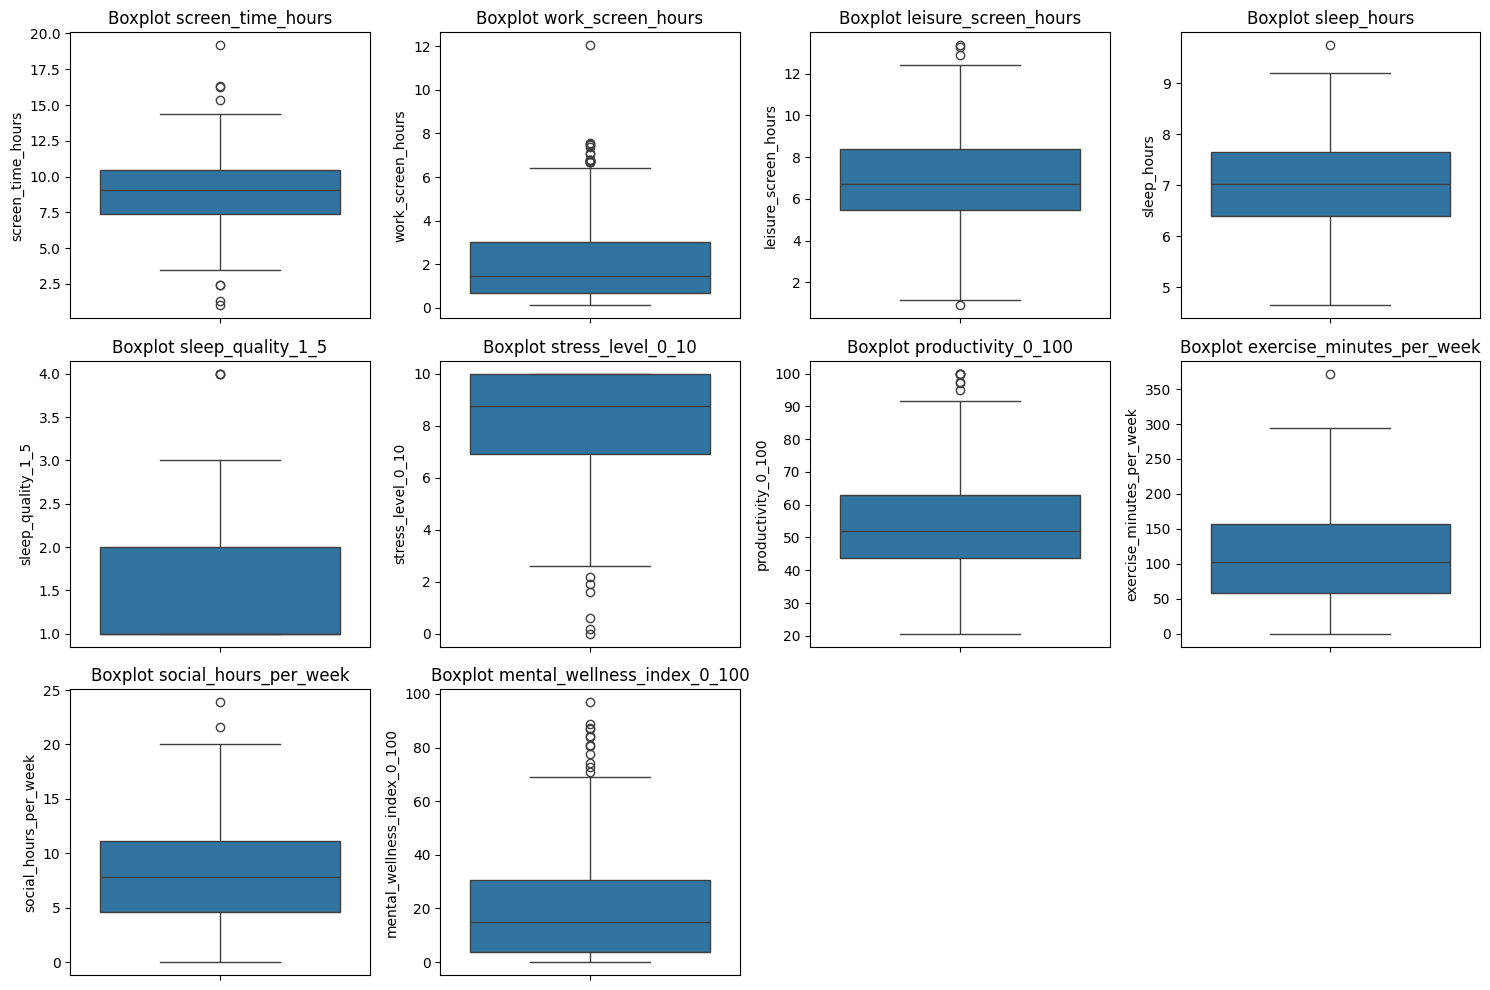

In [17]:
# Визуальный анализ выбросов с помощью boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем визуализацию
plt.figure(figsize=(15, 10))

# Создаем boxplot для числовых признаков (исключаем age, так как он в другом масштабе)
numerical_for_boxplot = [col for col in numerical_columns if col != 'age']

for i, col in enumerate(numerical_for_boxplot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()

In [18]:
# Анализ конкретных потенциальных выбросов
print("Анализ потенциальных выбросов:")

# Проверяем логические несоответствия
print("\n1. Проверка логических несоответствий:")
print(f"screen_time_hours = work_screen_hours + leisure_screen_hours:")
df['calculated_total_screen'] = df['work_screen_hours'] + df['leisure_screen_hours']
discrepancy = abs(df['screen_time_hours'] - df['calculated_total_screen'])
print(f"Максимальное расхождение: {discrepancy.max():.2f} часов")

# Проверяем экстремальные значения
print("\n2. Экстремальные значения (выше 99-го перцентиля):")
for col in numerical_columns:
    Q99 = df[col].quantile(0.99)
    extreme_values = df[df[col] > Q99]
    if len(extreme_values) > 0:
        print(f"{col}: {len(extreme_values)} значений выше {Q99:.2f}")

Анализ потенциальных выбросов:

1. Проверка логических несоответствий:
screen_time_hours = work_screen_hours + leisure_screen_hours:
Максимальное расхождение: 4.51 часов

2. Экстремальные значения (выше 99-го перцентиля):
age: 4 значений выше 47.05
screen_time_hours: 4 значений выше 14.40
work_screen_hours: 4 значений выше 7.37
leisure_screen_hours: 4 значений выше 12.31
sleep_hours: 4 значений выше 8.93
sleep_quality_1_5: 3 значений выше 3.00
productivity_0_100: 4 значений выше 97.72
exercise_minutes_per_week: 4 значений выше 284.10
social_hours_per_week: 4 значений выше 19.12
mental_wellness_index_0_100: 4 значений выше 84.52


In [19]:
# Обработка логического несоответствия в screen time
print("Обработка логического несоответствия в screen time:")

# Находим записи с большим расхождением
large_discrepancy = discrepancy[discrepancy > 1.0]  # Расхождение более 1 часа
print(f"Найдено {len(large_discrepancy)} записей с расхождением > 1 часа")

# Исправляем: пересчитываем screen_time_hours как сумму work + leisure
df['screen_time_hours_corrected'] = df['work_screen_hours'] + df['leisure_screen_hours']

# Сравниваем старые и новые значения
print("\nСравнение старых и исправленных значений:")
comparison = df[['screen_time_hours', 'screen_time_hours_corrected']].copy()
comparison['difference'] = abs(comparison['screen_time_hours'] - comparison['screen_time_hours_corrected'])
print(comparison[comparison['difference'] > 1.0].head(10))

# Заменяем исходный столбец исправленным
df['screen_time_hours'] = df['screen_time_hours_corrected']
df = df.drop('screen_time_hours_corrected', axis=1)

print("✅ Логическое несоответствие исправлено")

Обработка логического несоответствия в screen time:
Найдено 4 записей с расхождением > 1 часа

Сравнение старых и исправленных значений:
     screen_time_hours  screen_time_hours_corrected  difference
180               9.07                        4.560       4.510
200               9.07                       11.790       2.720
209              12.56                       11.075       1.485
323               9.17                        7.160       2.010
✅ Логическое несоответствие исправлено


In [20]:
# Детальный анализ выбросов
print("Детальный анализ потенциальных выбросов:")

# Будем использовать межквартильный размах (IQR) для определения выбросов
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_summary = {}

for col in numerical_columns:
    outliers = find_outliers_iqr(df[col])
    outliers_summary[col] = len(outliers)
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} выбросов (значения: {outliers.values})")

print(f"\nОбщее количество выбросов по всем признакам: {sum(outliers_summary.values())}")

Детальный анализ потенциальных выбросов:
age: 1 выбросов (значения: [60])
screen_time_hours: 8 выбросов (значения: [ 1.   16.29 16.36 15.38  2.44 19.17  2.44  1.32])
work_screen_hours: 15 выбросов (значения: [ 6.8   7.54  7.52  6.68  6.79  6.76  6.71  7.06  7.48  6.74  6.69 12.04
  7.1   7.36  6.7 ])
leisure_screen_hours: 4 выбросов (значения: [ 0.89 13.35 13.29 12.87])
sleep_hours: 1 выбросов (значения: [9.74])
sleep_quality_1_5: 3 выбросов (значения: [4. 4. 4.])
stress_level_0_10: 6 выбросов (значения: [1.6 2.2 0.  1.9 0.6 0.2])
productivity_0_100: 7 выбросов (значения: [ 95.  100.  100.  100.  100.   97.1  97.6])
exercise_minutes_per_week: 1 выбросов (значения: [372])
social_hours_per_week: 2 выбросов (значения: [21.6 23.9])
mental_wellness_index_0_100: 12 выбросов (значения: [86.8 74.3 72.6 80.9 87.2 97.  77.7 83.8 88.9 80.5 84.4 71. ])

Общее количество выбросов по всем признакам: 60


In [21]:
# Обработка выбросов - удаляем только явные аномалии
print("Обработка выбросов:")

# Определяем критерии для явных аномалий (значения, которые точно не могут быть правдой)
anomaly_rules = {
    'age': lambda x: (x < 18) | (x > 80),  # Возраст младше 18 или старше 80
    'sleep_hours': lambda x: (x < 2) | (x > 12),  # Сон менее 2 или более 12 часов
    'screen_time_hours': lambda x: x > 20,  # Более 20 часов экранного времени в день
    'exercise_minutes_per_week': lambda x: x > 1000,  # Более 1000 минут упражнений в неделю
}

rows_before = len(df)
anomaly_mask = pd.Series([False] * len(df))

for col, rule in anomaly_rules.items():
    if col in df.columns:
        col_anomalies = rule(df[col])
        anomaly_count = col_anomalies.sum()
        if anomaly_count > 0:
            print(f"Найдено {anomaly_count} аномалий в '{col}'")
            anomaly_mask = anomaly_mask | col_anomalies

# Удаляем строки с аномалиями
if anomaly_mask.sum() > 0:
    df = df[~anomaly_mask]
    print(f"Удалено {anomaly_mask.sum()} строк с явными аномалиями")
else:
    print("Явных аномалий не найдено")

print(f"Размер данных после обработки аномалий: {len(df)} строк")

Обработка выбросов:
Найдено 18 аномалий в 'age'
Удалено 17 строк с явными аномалиями
Размер данных после обработки аномалий: 379 строк


/tmp/ipython-input-1482424823.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~anomaly_mask]


In [22]:
# Кодирование категориальных признаков
print("Кодирование категориальных признаков:")

# Анализируем категориальные признаки после обработки
categorical_columns = ['gender', 'occupation', 'work_mode']
print("Категориальные признаки для кодирования:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} уникальных значений - {df[col].unique()}")

# 1. One-Hot Encoding для occupation и work_mode (более 2 категорий)
print("\n1. One-Hot Encoding для occupation и work_mode:")
columns_to_encode = ['occupation', 'work_mode']

for col in columns_to_encode:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    print(f"Создано {len(dummies.columns)} бинарных колонок для '{col}': {list(dummies.columns)}")

# 2. Бинарное кодирование для gender (3 категории, но преобразуем в бинарные)
print("\n2. Бинарное кодирование для gender:")
# Создаем бинарные колонки для каждого значения gender
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_dummies], axis=1)
print(f"Создано {len(gender_dummies.columns)} бинарных колонок для 'gender': {list(gender_dummies.columns)}")

# Удаляем исходные категориальные колонки (кроме user_id, который нам может понадобиться для идентификации)
columns_to_drop = categorical_columns
df = df.drop(columns=columns_to_drop)
print(f"\nУдалены исходные категориальные колонки: {columns_to_drop}")

print(f"\nРазмер данных после кодирования: {df.shape}")
print("Новые колонки после кодирования:")
print(df.columns.tolist())

Кодирование категориальных признаков:
Категориальные признаки для кодирования:
gender: 3 уникальных значений - ['Female' 'Male' 'Non-binary/Other']
occupation: 5 уникальных значений - ['Employed' 'Student' 'Self-employed' 'Retired' 'Unemployed']
work_mode: 3 уникальных значений - ['Remote' 'In-person' 'Hybrid']

1. One-Hot Encoding для occupation и work_mode:
Создано 5 бинарных колонок для 'occupation': ['occupation_Employed', 'occupation_Retired', 'occupation_Self-employed', 'occupation_Student', 'occupation_Unemployed']
Создано 3 бинарных колонок для 'work_mode': ['work_mode_Hybrid', 'work_mode_In-person', 'work_mode_Remote']

2. Бинарное кодирование для gender:
Создано 3 бинарных колонок для 'gender': ['gender_Female', 'gender_Male', 'gender_Non-binary/Other']

Удалены исходные категориальные колонки: ['gender', 'occupation', 'work_mode']

Размер данных после кодирования: (379, 24)
Новые колонки после кодирования:
['user_id', 'age', 'screen_time_hours', 'work_screen_hours', 'leisure

Анализ корреляций между признаками:


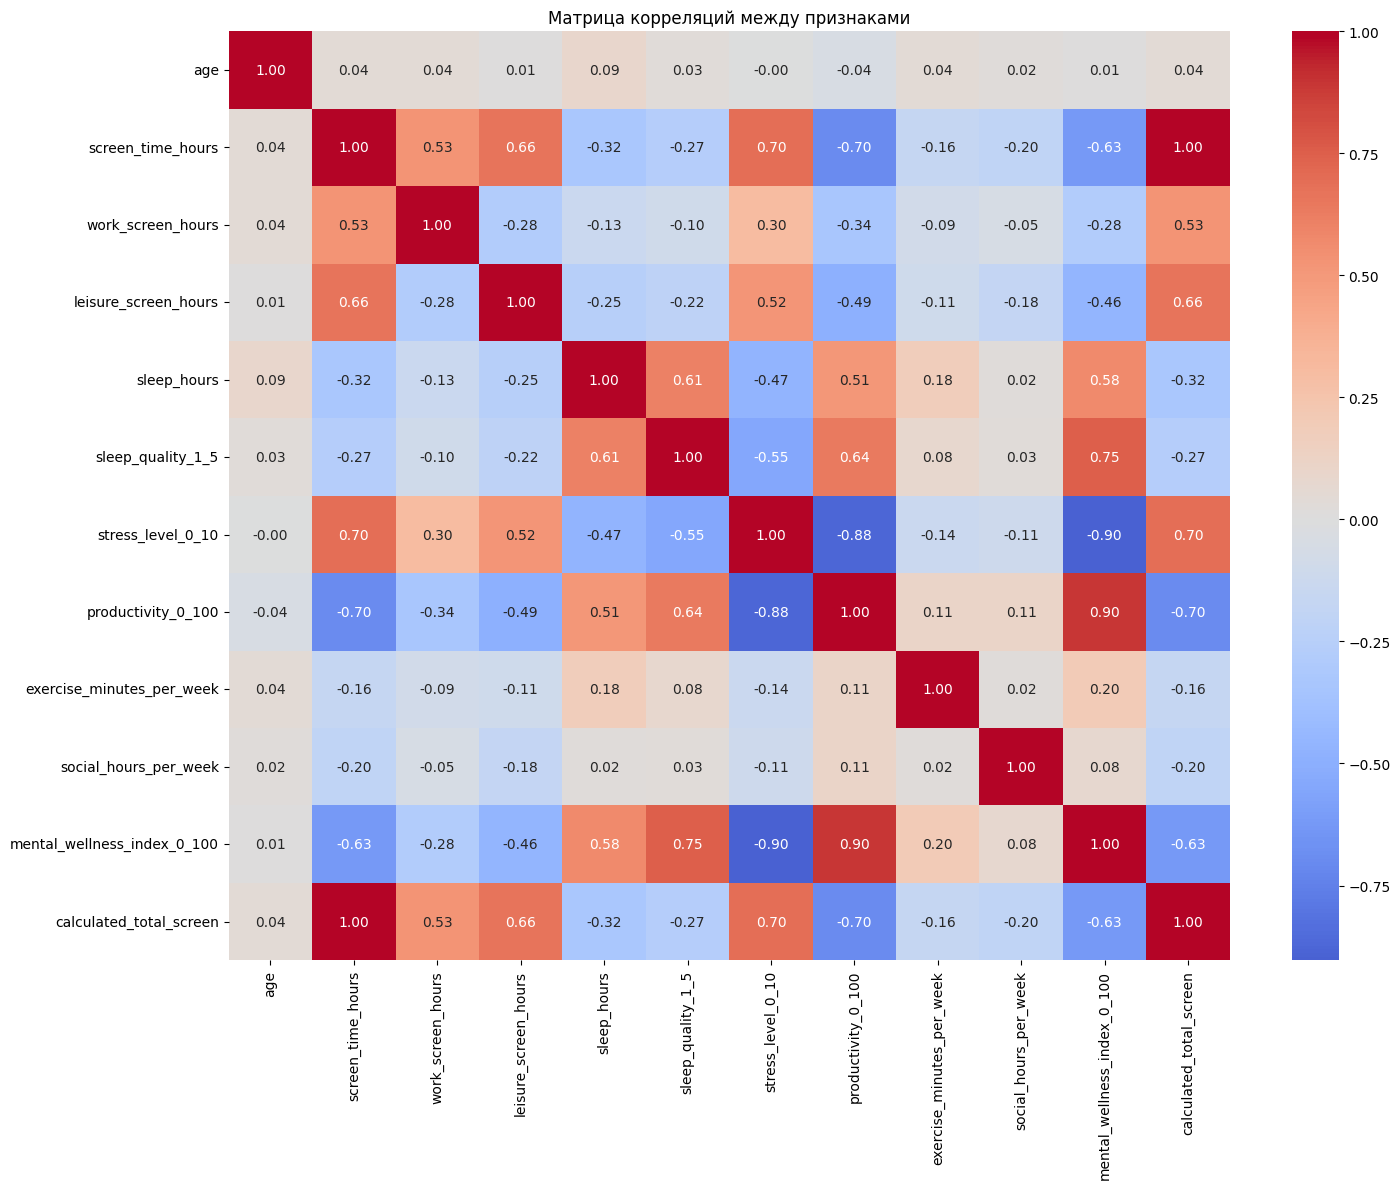

Высококоррелированные признаки (коэффициент > 0.8):
screen_time_hours - calculated_total_screen: 1.000
stress_level_0_10 - productivity_0_100: -0.879
stress_level_0_10 - mental_wellness_index_0_100: -0.903
productivity_0_100 - mental_wellness_index_0_100: 0.896


In [23]:
# Анализ корреляций между признаками
print("Анализ корреляций между признаками:")

# Создаем матрицу корреляций для числовых признаков
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# Визуализируем матрицу корреляций
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций между признаками')
plt.tight_layout()
plt.show()

# Находим высококоррелированные признаки (коэффициент > 0.8)
print("Высококоррелированные признаки (коэффициент > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.3f}")

In [24]:
# Удаляем user_id, так как это идентификатор, а не признак для модели
if 'user_id' in df.columns:
    user_ids = df['user_id'].copy()  # Сохраняем на всякий случай
    df = df.drop('user_id', axis=1)
    print("Удален столбец 'user_id' - это идентификатор, а не признак для модели")

print(f"Финальный размер данных: {df.shape}")
print("Финальные колонки:")
print(df.columns.tolist())

Удален столбец 'user_id' - это идентификатор, а не признак для модели
Финальный размер данных: (379, 23)
Финальные колонки:
['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'calculated_total_screen', 'occupation_Employed', 'occupation_Retired', 'occupation_Self-employed', 'occupation_Student', 'occupation_Unemployed', 'work_mode_Hybrid', 'work_mode_In-person', 'work_mode_Remote', 'gender_Female', 'gender_Male', 'gender_Non-binary/Other']


In [25]:
# Удаление избыточных и высококоррелированных признаков
print("Удаление избыточных и высококоррелированных признаков:")

# 1. calculated_total_screen - полностью дублирует screen_time_hours (корреляция 1.0)
if 'calculated_total_screen' in df.columns:
    df = df.drop('calculated_total_screen', axis=1)
    print("Удален 'calculated_total_screen' - полностью дублирует screen_time_hours")

# 2. Анализ триады высококоррелированных признаков: stress_level, productivity, mental_wellness
# Они сильно коррелируют между собой. Оставим mental_wellness как целевую переменную для примера
# и удалим два других, чтобы избежать мультиколлинеарности
high_corr_to_drop = ['stress_level_0_10', 'productivity_0_100']
df = df.drop(columns=high_corr_to_drop)
print(f"Удалены высококоррелированные признаки: {high_corr_to_drop}")

print(f"\nРазмер данных после удаления избыточных признаков: {df.shape}")
print("Оставшиеся колонки:")
print(df.columns.tolist())

Удаление избыточных и высококоррелированных признаков:
Удален 'calculated_total_screen' - полностью дублирует screen_time_hours
Удалены высококоррелированные признаки: ['stress_level_0_10', 'productivity_0_100']

Размер данных после удаления избыточных признаков: (379, 20)
Оставшиеся колонки:
['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'occupation_Employed', 'occupation_Retired', 'occupation_Self-employed', 'occupation_Student', 'occupation_Unemployed', 'work_mode_Hybrid', 'work_mode_In-person', 'work_mode_Remote', 'gender_Female', 'gender_Male', 'gender_Non-binary/Other']


In [26]:
# Стандартизация числовых признаков
print("Стандартизация числовых признаков:")

from sklearn.preprocessing import StandardScaler

# Выделяем числовые признаки для стандартизации (исключаем бинарные)
numerical_cols_to_scale = ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours',
                          'sleep_hours', 'sleep_quality_1_5', 'exercise_minutes_per_week',
                          'social_hours_per_week', 'mental_wellness_index_0_100']

# Создаем копию исходных данных перед стандартизацией
df_original = df.copy()

# Применяем стандартизацию
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Стандартизированы следующие признаки:")
for col in numerical_cols_to_scale:
    print(f" - {col}")

# Проверяем результат стандартизации
print("\nСтатистика после стандартизации:")
df[numerical_cols_to_scale].describe()

Стандартизация числовых признаков:
Стандартизированы следующие признаки:
 - age
 - screen_time_hours
 - work_screen_hours
 - leisure_screen_hours
 - sleep_hours
 - sleep_quality_1_5
 - exercise_minutes_per_week
 - social_hours_per_week
 - mental_wellness_index_0_100

Статистика после стандартизации:


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,-1.218609e-16,-1.265478e-16,1.546696e-16,-1.031131e-16,5.483740e-16,-1.218609e-16,-2.812174e-17,8.436523e-17,-4.686957e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-2.041031e+00,-3.218389e+00,-1.075641e+00,-2.698429e+00,-2.757711e+00,-5.861443e-01,-1.577145e+00,-1.620130e+00,-9.910729e-01
25%,-7.664142e-01,-6.836222e-01,-7.773014e-01,-6.244745e-01,-7.111507e-01,-5.861443e-01,-7.368387e-01,-6.814658e-01,-8.016762e-01
50%,-5.829382e-02,3.716458e-02,-3.812302e-01,-7.081497e-02,2.561093e-02,-5.861443e-01,-9.763118e-02,-2.848190e-02,-2.637895e-01
75%,6.498266e-01,6.258071e-01,4.314873e-01,7.210997e-01,7.331359e-01,9.673431e-01,6.780364e-01,6.449077e-01,5.291515e-01
max,4.190428e+00,4.057553e+00,5.060891e+00,2.956160e+00,3.206550e+00,4.074318e+00,3.766343e+00,3.256843e+00,3.907989e+00


In [27]:
# Разделение данных на выборки
print("Разделение данных на тренировочную, валидационную и тестовую выборки:")

from sklearn.model_selection import train_test_split

# Предположим, что mental_wellness_index_0_100 - это целевая переменная
X = df.drop('mental_wellness_index_0_100', axis=1)
y = df['mental_wellness_index_0_100']

print(f"Признаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")

# Сначала разделяем на тренировочную (70%) и временную (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Затем временную разделяем на валидационную (20% от исходных) и тестовую (10% от исходных)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42  # 0.333 * 0.3 ≈ 0.1
)

print(f"\nРазмеры выборок:")
print(f"Тренировочная: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Валидационная: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Тестовая: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Разделение данных на тренировочную, валидационную и тестовую выборки:
Признаки (X): (379, 19)
Целевая переменная (y): (379,)

Размеры выборок:
Тренировочная: 265 samples (69.9%)
Валидационная: 76 samples (20.1%)
Тестовая: 38 samples (10.0%)


In [28]:
# Финальная проверка обработки данных
print("ФИНАЛЬНАЯ ПРОВЕРКА ОБРАБОТКИ ДАННЫХ:")
print("=" * 50)

print(f"1. Исходный размер: 400 строк")
print(f"2. Финальный размер: {len(df)} строк")
print(f"3. Удалено строк: {400 - len(df)} (дубликаты, пропуски, аномалии)")
print(f"4. Количество признаков: {X.shape[1]}")
print(f"5. Пропущенные значения: {df.isnull().sum().sum()}")
print(f"6. Типы данных:")
print(df.dtypes.value_counts())
print(f"7. Выборки подготовлены: ✅")
print(f"   - Тренировочная: {X_train.shape[0]} samples")
print(f"   - Валидационная: {X_val.shape[0]} samples")
print(f"   - Тестовая: {X_test.shape[0]} samples")

print("\n" + "=" * 50)
print("✅ ПОДГОТОВКА ДАННЫХ ЗАВЕРШЕНА УСПЕШНО!")

ФИНАЛЬНАЯ ПРОВЕРКА ОБРАБОТКИ ДАННЫХ:
1. Исходный размер: 400 строк
2. Финальный размер: 379 строк
3. Удалено строк: 21 (дубликаты, пропуски, аномалии)
4. Количество признаков: 19
5. Пропущенные значения: 0
6. Типы данных:
bool       11
float64     9
Name: count, dtype: int64
7. Выборки подготовлены: ✅
   - Тренировочная: 265 samples
   - Валидационная: 76 samples
   - Тестовая: 38 samples

✅ ПОДГОТОВКА ДАННЫХ ЗАВЕРШЕНА УСПЕШНО!


In [30]:
# Сохранение одного файла с обработанными данными
print("Сохранение обработанных данных...")

# Сохраняем полный обработанный датасет в CSV
df.to_csv('/content/processed_mental_health_data.csv', index=False)
print("✅ Обработанный датасет сохранен как 'processed_mental_health_data.csv'")

# Проверяем сохраненный файл
print(f"\n📊 Информация о сохраненном файле:")
print(f"Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Файл: /content/processed_mental_health_data.csv")

# Показываем первые 3 строки сохраненных данных
print("\nПервые 3 строки сохраненных данных:")
print(df.head(3))

Сохранение обработанных данных...
✅ Обработанный датасет сохранен как 'processed_mental_health_data.csv'

📊 Информация о сохраненном файле:
Размер: 379 строк, 20 столбцов
Файл: /content/processed_mental_health_data.csv

Первые 3 строки сохраненных данных:
        age  screen_time_hours  work_screen_hours  leisure_screen_hours  \
0  0.366578           0.701890           1.665995             -0.674395   
1 -0.341542          -0.655592          -0.941902              0.088022   
2  0.649827           0.297449          -0.571550              0.841362   

   sleep_hours  sleep_quality_1_5  exercise_minutes_per_week  \
0    -0.430480          -0.586144                   0.247110   
1     1.230158           2.520831                  -0.514193   
2    -0.605899          -0.586144                  -0.614743   

   social_hours_per_week  mental_wellness_index_0_100  occupation_Employed  \
0              -1.477290                    -0.521369                 True   
1              -1.191609      

In [31]:
# Скачивание файла на компьютер
print("Скачивание обработанных данных на компьютер...")

from google.colab import files

# Скачиваем CSV файл
files.download('/content/processed_mental_health_data.csv')
print("✅ processed_mental_health_data.csv скачан на ваш компьютер")

print("\n🎉 Файл с обработанными данными готов!")

Скачивание обработанных данных на компьютер...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ processed_mental_health_data.csv скачан на ваш компьютер

🎉 Файл с обработанными данными готов!
